<a href="https://colab.research.google.com/github/zia207/r-colab/blob/main/NoteBook/R_Beginner/01-05-05-eda-SamrtEDA-r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1bLQ3nhDbZrCCqy_WCxxckOne2lgVvn3l)


## Data Exploration with {SmartEDA}

In this tutorial, we will guide you through the various features of the `{SmartEDA}` package for EDA. The package is particularly useful for both beginners and experienced data analysts, as it simplifies the process of EDA while still providing powerful capabilities.


## Introduction



The {SmartEDA} package provides a quick way to generate a summary of the dataset using the `ExpData()` function. This function gives an overview of the data, including basic statistics and data type information. It provides detailed summaries, visualizations, and diagnostics to analyze datasets effectively. Key features:

- Auto-generated statistics (numeric and categorical variables).

- Interactive visualizations (histograms, bar plots, scatterplots, etc.).

- Missing value analysis and correlation matrices.

- Flexible customization for variables and report structure.

- Shiny app integration for dynamic exploration.


## Setup R in Python Runtype - Install {rpy2}

{rpy2} is a Python package that provides an interface to the R programming language, allowing Python users to run R code, call R functions, and manipulate R objects directly from Python. It enables seamless integration between Python and R, leveraging R's statistical and graphical capabilities while using Python's flexibility. The package supports passing data between the two languages and is widely used for statistical analysis, data visualization, and machine learning tasks that benefit from R's specialized libraries.

In [1]:
!pip uninstall rpy2 -y
! pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.5.17
Uninstalling rpy2-3.5.17:
  Successfully uninstalled rpy2-3.5.17
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp311-cp311-linux_x86_64.whl size=314977 sha256=f313c0d124101d718217ba51a1d7c640b2324d45bc1812c2c2a615aa4e598431
  Stored in directory: /root/.cache/pip/wheels/e9/55/d1/47be85a5f3f1e1f4d1e91cb5e3a4dcb40dd72147f184c5a5ef
Successfully built rpy2


##  Mount Google Drive

Then you must create a folder in Goole drive named "R" to install all packages permanently. Before installing R-package in Python runtime. You have to mount Google Drive and follow on-screen instruction:

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Check and Install Required R Packages

In [3]:
%%R
packages <- c('tidyverse',
         'SmartEDA',
         'ggthemes'

         )

In [4]:
%%R
# Install missing packages
new.packages <- packages[!(packages %in% installed.packages(lib='drive/My Drive/R/')[,"Package"])]
if(length(new.packages)) install.packages(new.packages, lib='drive/My Drive/R/')










	‘/tmp/RtmpiAxQYw/downloaded_packages’



In [5]:
%%R
# Verify installation
cat("Installed packages:\n")
print(sapply(packages, requireNamespace, quietly = TRUE))

Installed packages:
tidyverse  SmartEDA  ggthemes 
     TRUE     FALSE     FALSE 


## Load Packages

In [6]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Load packages with suppressed messages
invisible(lapply(packages, function(pkg) {
  suppressPackageStartupMessages(library(pkg, character.only = TRUE))
}))


In [7]:
%%R
# Check loaded packages
cat("Successfully loaded packages:\n")
print(search()[grepl("package:", search())])

Successfully loaded packages:
 [1] "package:ggthemes"  "package:SmartEDA"  "package:lubridate"
 [4] "package:forcats"   "package:stringr"   "package:dplyr"    
 [7] "package:purrr"     "package:readr"     "package:tidyr"    
[10] "package:tibble"    "package:ggplot2"   "package:tidyverse"
[13] "package:tools"     "package:stats"     "package:graphics" 
[16] "package:grDevices" "package:utils"     "package:datasets" 
[19] "package:methods"   "package:base"     


## Data


The data set use in this exercise can be downloaded from my [Dropbox](https://www.dropbox.com/scl/fo/fohioij7h503duitpl040/h?rlkey=3voumajiklwhgqw75fe8kby3o&dl=0) or from my [Github](https://github.com/zia207/r-colab/tree/main/Data/R_Beginners) account.

We will use `read_csv()` function of **readr** package to import data as a **tidy** data.

In [8]:
%%R
mf<-read_csv("https://github.com/zia207/r-colab/raw/main/Data/R_Beginners/gp_soil_data_na.csv")

Rows: 471 Columns: 19
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): STATE, COUNTY, NLCD, FRG
dbl (15): ID, FIPS, STATE_ID, Longitude, Latitude, SOC, DEM, Aspect, Slope, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## Generate a quick EDA summary

The `ExpData()` function is the main function provided by the `SmartEDA` package. It generates a summary of the dataset, including key statistics for each variable. The `type` argument specifies the level of summary:

- `type = 1`: Provides basic information like data types, missing values, and unique values.
- `type = 2`: Offers a more detailed summary, including distribution statistics.


In [9]:
 %%R
 mf |>  dplyr::select(NLCD, SOC, DEM, MAP, MAT, NDVI) |>
   SmartEDA::ExpData(type = 1)

                                          Descriptions      Value
1                                   Sample size (nrow)        471
2                              No. of variables (ncol)          6
3                    No. of numeric/interger variables          5
4                              No. of factor variables          0
5                                No. of text variables          1
6                             No. of logical variables          0
7                          No. of identifier variables          0
8                                No. of date variables          0
9             No. of zero variance variables (uniform)          0
10               %. of variables having complete cases 83.33% (5)
11   %. of variables having >0% and <50% missing cases 16.67% (1)
12 %. of variables having >=50% and <90% missing cases     0% (0)
13          %. of variables having >=90% missing cases     0% (0)


In [10]:
%%R
# detail summary
 mf |>  dplyr::select(NLCD, SOC, DEM, MAP, MAT, NDVI) |>
   SmartEDA::ExpData(type = 2)


  Index Variable_Name Variable_Type Sample_n Missing_Count Per_of_Missing
1     1          NLCD     character      471             0          0.000
2     2           SOC       numeric      467             4          0.008
3     3           DEM       numeric      471             0          0.000
4     4           MAP       numeric      471             0          0.000
5     5           MAT       numeric      471             0          0.000
6     6          NDVI       numeric      471             0          0.000
  No_of_distinct_values
1                     4
2                   456
3                   464
4                   464
5                   463
6                   464


## Descriptive Statistics

To compute detailed descriptive statistics for numeric and categorical variables, you can use the `ExpnsNumStat()` and `ExpCatStat()` functions.

Key arguments:

- `by`: Specifies whether to compute statistics for all variables or by group.
- `Qnt`: Quantiles to calculate.
- `Outlier`: If `TRUE`, identifies outliers.

### Summary statistics for numeric variables

In [11]:
%%R
# Summary statistics for numeric variables
 mf |>  dplyr::select(NLCD, SOC, DEM, MAP, MAT, NDVI) |>
   SmartEDA::ExpNumStat()

  Vname Group  TN nNeg nZero nPos NegInf PosInf NA_Value Per_of_Missing
2   DEM   All 471    0     0  471      0      0        0          0.000
3   MAP   All 471    0     0  471      0      0        0          0.000
4   MAT   All 471    6     0  465      0      0        0          0.000
5  NDVI   All 471    0     0  471      0      0        0          0.000
1   SOC   All 471    0     0  467      0      0        4          0.849
         sum     min      max     mean   median      SD    CV      IQR Skewness
2 768251.070 258.649 3618.024 1631.106 1592.893 767.692 0.471 1058.934   -0.023
3 235204.661 193.913 1128.115  499.373  432.630 206.936 0.414  237.652    1.079
4   4185.080  -0.591   16.874    8.886    9.173   4.098 0.461    6.564   -0.274
5    205.088   0.142    0.797    0.435    0.416   0.162 0.372    0.251    0.233
1   2965.806   0.408   30.473    6.351    4.971   5.045 0.794    5.944    1.460
  Kurtosis
2   -0.808
3    0.452
4   -0.828
5   -0.921
1    2.388


### Summary statistics for categorical variables


`Stat` - summary statistics,
`IV` - information value

In [12]:
%%R
df <- mf |>
  dplyr::select(NLCD, SOC, DEM, MAP, MAT, NDVI)

ExpCatStat(df,
           Target="NLCD",
           result = "Stat",
           clim=10,
           nlim=10,bins=10,
           Pclass=1,
           plot=FALSE,
           top=20,
           Round=2)

  Variable Target Unique Chi-squared p-value df IV Value Cramers V
1      SOC   NLCD      9      42.543   0.003 NA        0      0.19
2      DEM   NLCD     10     515.564   0.000 NA        0      0.60
3      MAP   NLCD     10     280.146   0.000 NA        0      0.45
4      MAT   NLCD     10     346.840   0.000 NA        0      0.50
5     NDVI   NLCD     10     344.735   0.000 NA        0      0.49
  Degree of Association Predictive Power
1              Moderate   Not Predictive
2                Strong   Not Predictive
3                Strong   Not Predictive
4                Strong   Not Predictive
5                Strong   Not Predictive


#### Information value plot

  Variable Target Unique Chi-squared p-value df IV Value Cramers V
1      SOC   NLCD      9      42.543   0.004 NA        0      0.19
2      DEM   NLCD     10     515.564   0.000 NA        0      0.60
3      MAP   NLCD     10     280.146   0.000 NA        0      0.45
4      MAT   NLCD     10     346.840   0.000 NA        0      0.50
5     NDVI   NLCD     10     344.735   0.000 NA        0      0.49
  Degree of Association Predictive Power
1              Moderate   Not Predictive
2                Strong   Not Predictive
3                Strong   Not Predictive
4                Strong   Not Predictive
5                Strong   Not Predictive


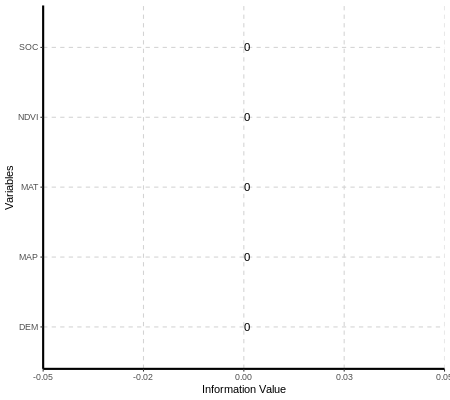

In [13]:
%%R -w 450 -h 400 -u px

ExpCatStat(df,
           Target="NLCD",
           result = "Stat",
           clim=10,
           nlim=10,bins=10,
           Pclass=1,
           plot=TRUE,
           top=20,
           Round=2)

`Information value (IV)`   is a measure of the predictive power of a categorical variable in relation to a target variable (Weight of evidence and Information values). It quantifies how well a categorical variable can differentiate between different classes or outcomes in the target variable. The IV is calculated based on the distribution of the categorical variable across different classes of the target variable.

Criteria used for categorical variable predictive power classification are

- `IV  is < 0.03 `then predictive power =`Not Predictive`

- `IV  is 0.3 to 0.1` then predictive power = `Somewhat Predictive`

- `IV 0.1 to 0.3` then predictive power = `Meidum Predictive`

- `>0.3` then predictive power = `Highly Predictive`


#### Information value for categorical Independent variables

In [14]:
%%R -w 450 -h 400 -u px

ExpCatStat(df,
           Target="NLCD",
           result = "IV",
           clim=10,
           nlim=10,bins=10,
           Pclass=1,
           plot=TRUE,
           top=20,
           Round=2)

   Variable               Class Out_1 Out_0 TOTAL Per_1 Per_0 Odds WOE IV Ref_1
1     SOC.1       [1.286,2.304]    47    47    94  0.10  0.10    1   0  0     1
2     SOC.2       (2.304,3.105]    47    47    94  0.10  0.10    1   0  0     1
3     SOC.3       (3.105,3.983]    47    47    94  0.10  0.10    1   0  0     1
4     SOC.4       (3.983,4.971]    47    47    94  0.10  0.10    1   0  0     1
5     SOC.5       (4.971,6.123]    46    46    92  0.10  0.10    1   0  0     1
6     SOC.6         (6.123,7.5]    47    47    94  0.10  0.10    1   0  0     1
7     SOC.7        (7.5,10.076]    48    48    96  0.10  0.10    1   0  0     1
8     SOC.8     (10.076,13.351]    45    45    90  0.10  0.10    1   0  0     1
9     SOC.9                <NA>    97    97   194  0.21  0.21    1   0  0     1
10    DEM.1   [258.649,439.696]    47    47    94  0.10  0.10    1   0  0     1
11    DEM.2   (439.696,924.605]    47    47    94  0.10  0.10    1   0  0     1
12    DEM.3    (924.605,1261.5]    47   

### Customized summary statistics

`ExpCustomStat{}` fuction You can customize the summary statistics. Output returns matrix object containing descriptive information on all input variables for each level or combination of levels in categorical/group variable. Also while running the analysis user can filter out the data by individual variable level or across data level.

In [16]:
%%R
ExpCustomStat(df,
             Cvar="NLCD",                 # categorical variable to group by
             Nvar = c("SOC","NDVI"),        # quantitative variables on which to run summary statistics for.
             stat = c("Count","sum","var", "mean"), #  descriptive statistics
             gpby = TRUE)

                 NLCD Attribute Count       sum         var       mean
               <char>    <char> <int>     <num>       <num>      <num>
1:          Shrubland       SOC   130 524.60700 14.02396956  4.1307638
2:             Forest       SOC    93 970.07200 46.26920463 10.4308817
3: Planted/Cultivated       SOC    97 649.58200 12.94777281  6.6967216
4:         Herbaceous       SOC   151 821.54500 15.40634178  5.4769667
5:          Shrubland      NDVI   130  39.85538  0.01678473  0.3065798
6:             Forest      NDVI    93  53.06253  0.01334062  0.5705648
7: Planted/Cultivated      NDVI    97  51.72287  0.01471496  0.5332255
8:         Herbaceous      NDVI   151  60.44728  0.01708390  0.4003131


### Summary statistics for individual categorical predictors

`ExpStat()` provides bivariate summary statistics for all the categorical predictors against target variables. Output includes chi - square value, degrees of freedom, information value, p-value

`X`	= Independent categorical variable.

`Y`	 = Binary response variable, it can take values of either 1 or 0.

The function provides summary statistics like

- Unique number of levels

- Chi square statistics

- P value

- df Degrees of freedom

- IV Information value

- Predictive class

In [17]:
%%R
data("mtcars")
X = mtcars$carb
Y = mtcars$am
ExpStat(X,Y,valueOfGood = 1)

     X-squared            
[1,] "6"                  
[2,] "6.237"              
[3,] "0.268"              
[4,] NA                   
[5,] "0.17"               
[6,] "0.44"               
[7,] "Strong"             
[8,] "Somewhat Predictive"


### Visualization

The {SmartEDA} package includes several visualization tools for data exploration. The `ExpNumViz()` function is particularly useful for creating visual summaries.

####  Density plot

[[1]]

[[2]]

[[3]]

[[4]]



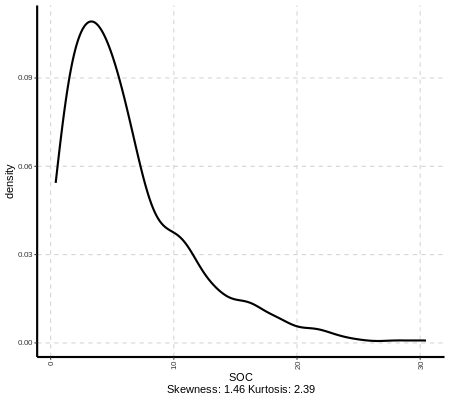

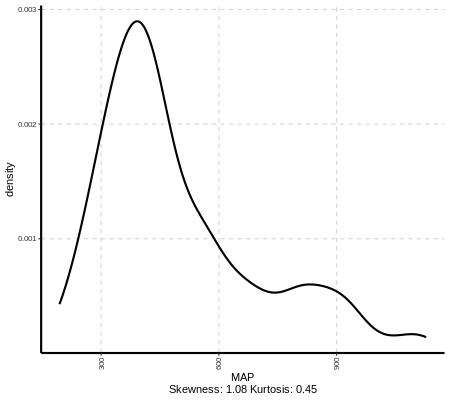

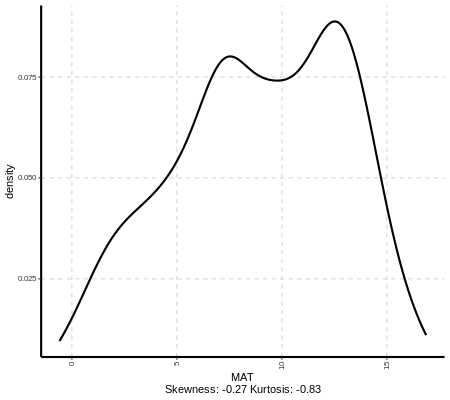

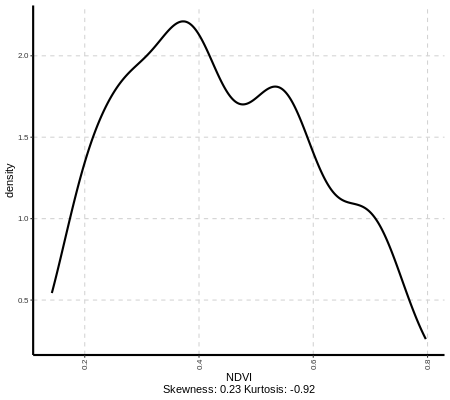

In [18]:
%%R -w 450 -h 400 -u px
# Visualize data distributions
ExpNumViz(df, nlim = 2,
          col = NULL,
           Page = NULL,
          sample = 4,
          scatter = FALSE,
          gtitle = "Density plot: ")

#### Boxplot

[[1]]

[[2]]

[[3]]

[[4]]



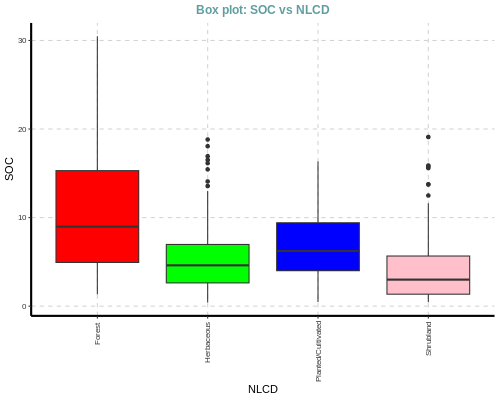

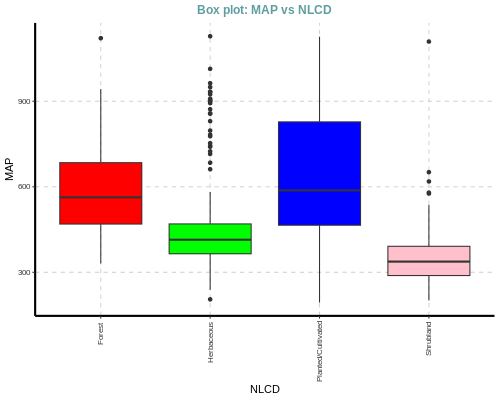

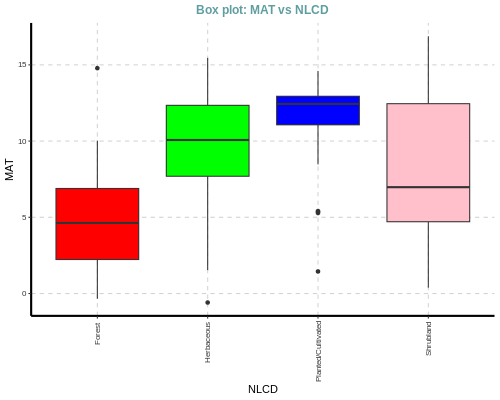

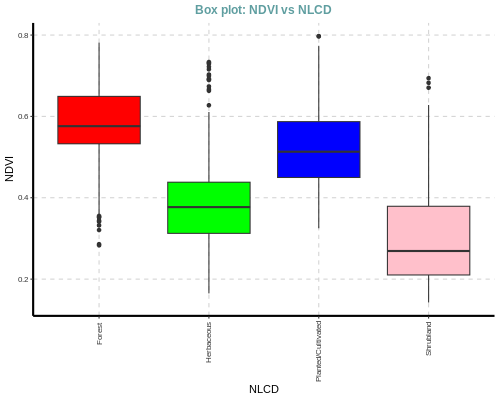

In [19]:
%%R -w 500 -h 400 -u px

ExpNumViz(df,
          target = "NLCD", type = 2, nlim = 2,
          col = c("red", "green", "blue", "pink"),
          Page = NULL,
          sample = 4,
          scatter = FALSE,
          gtitle = "Box plot: ")

#### Scatter plot

[[1]]

[[2]]

[[3]]

[[4]]



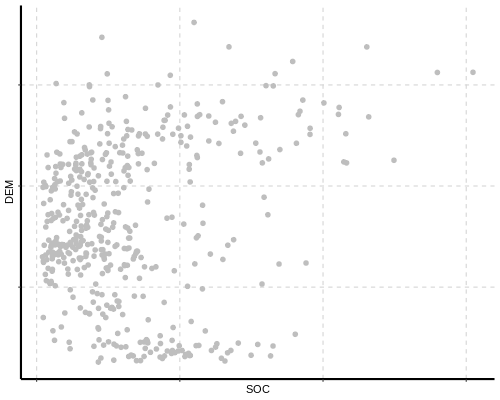

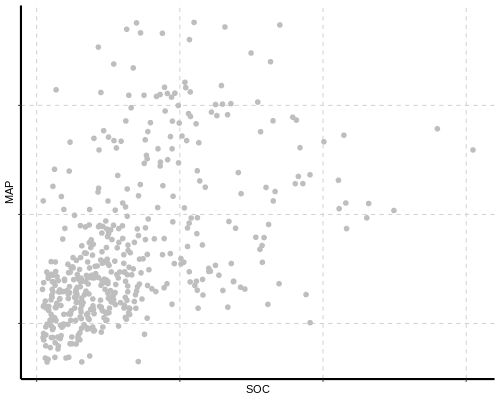

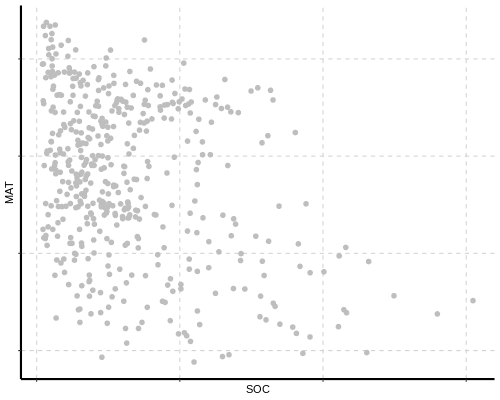

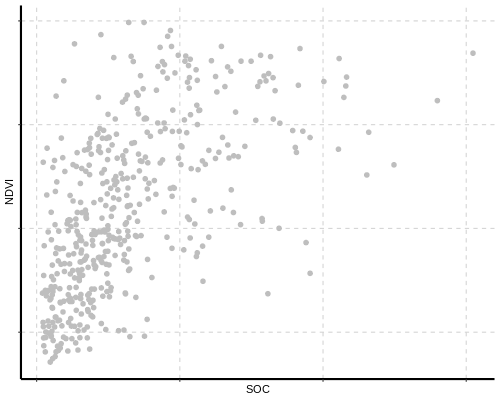

In [27]:
%%R -w 500 -h 400 -u px

ExpNumViz(df,
          target = "SOC",
          type = 1,
          nlim = 2,
          col = "gray",
          Page = NULL, sample = NULL,
          scatter = FALSE,
          gtitle = "Scatter plot: ", theme = "Default")

[[1]]

[[2]]

[[3]]

[[4]]

[[5]]

[[6]]

[[7]]

[[8]]

[[9]]

[[10]]



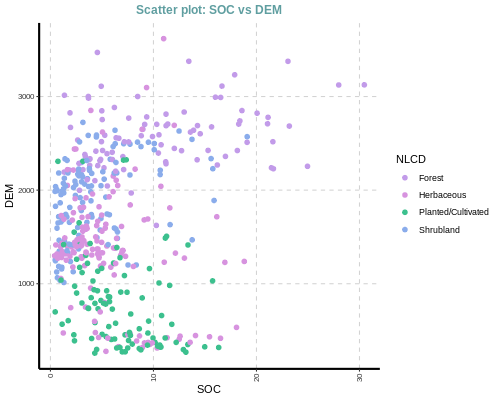

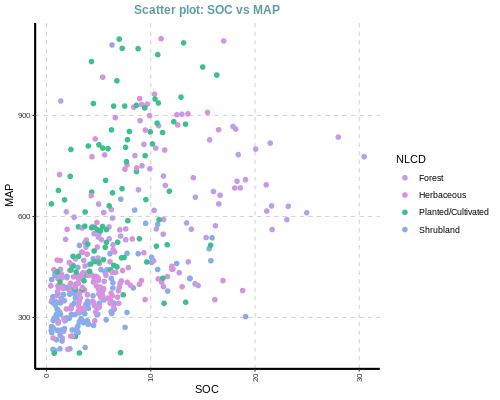

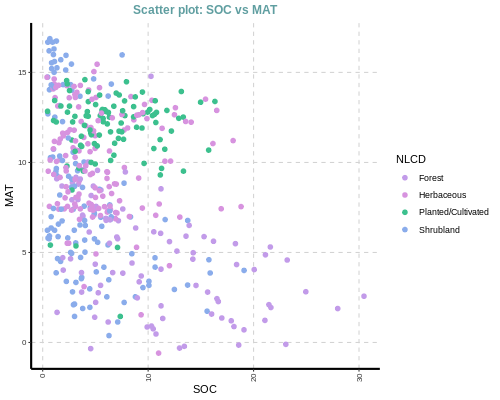

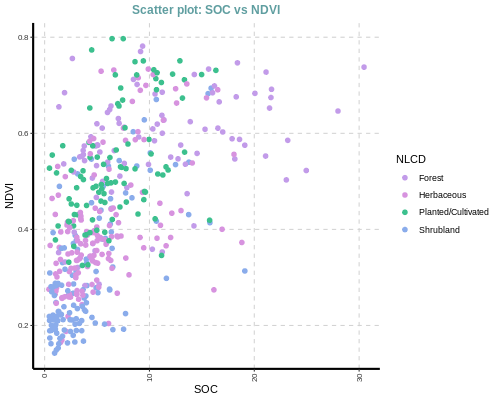

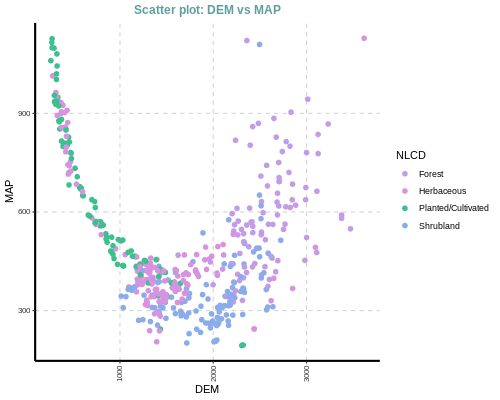

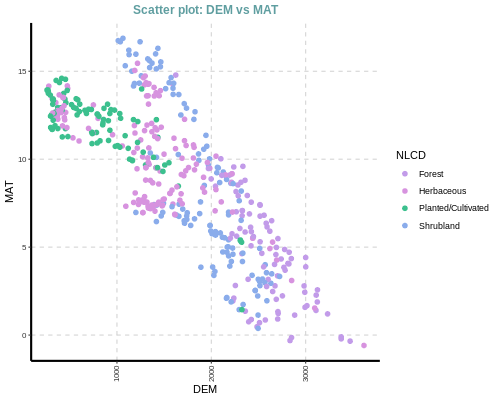

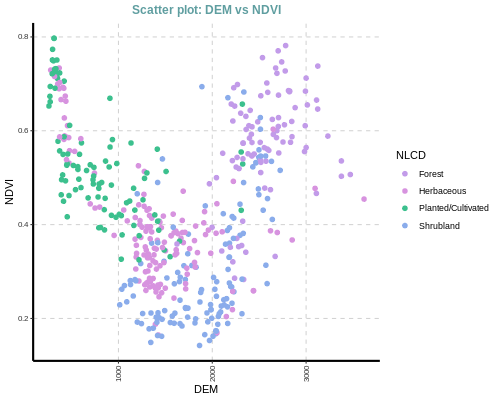

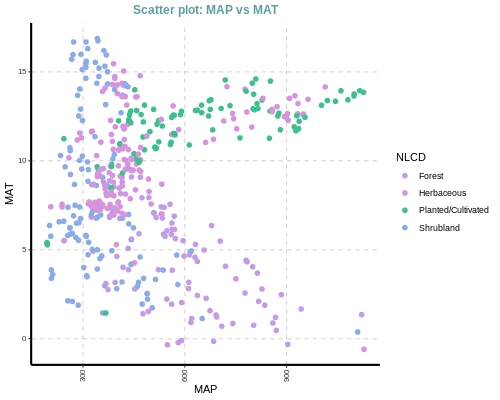

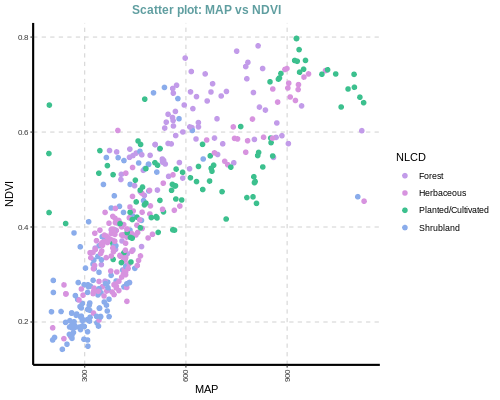

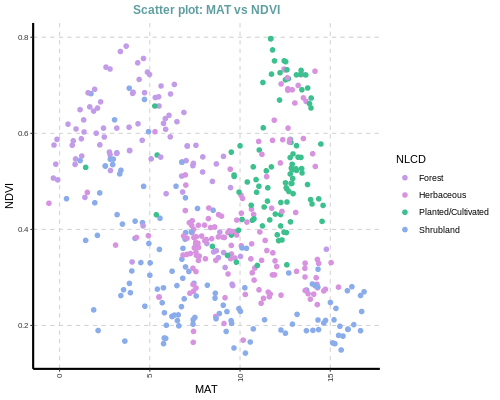

In [28]:
%%R -w 500 -h 400 -u px

## Generate Scatter plot for all the numerical variables
ExpNumViz(df,
          target = "NLCD",
          type = 1, nlim = 2,
           col = c("red", "green", "blue"),
          Page = NULL, sample = NULL, scatter = TRUE,
           gtitle = "Scatter plot: ", theme = "Default")


#### Quantile Quantile Plots

The `ExpOutQQ()` function generates quantile-quantile (QQ) plots to assess the normality of the data. QQ plots compare the quantiles of the data against the quantiles of a theoretical normal distribution. If the points in the QQ plot follow a straight line, it suggests that the data is normally distributed.

[[1]]

[[2]]

[[3]]

[[4]]



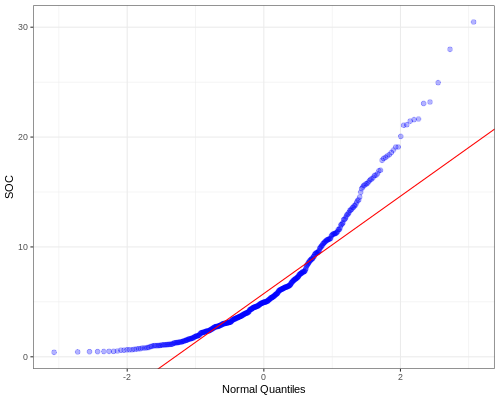

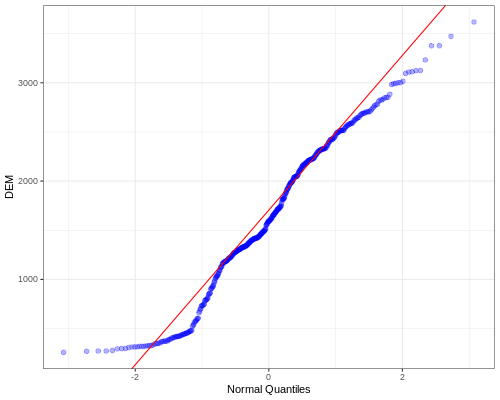

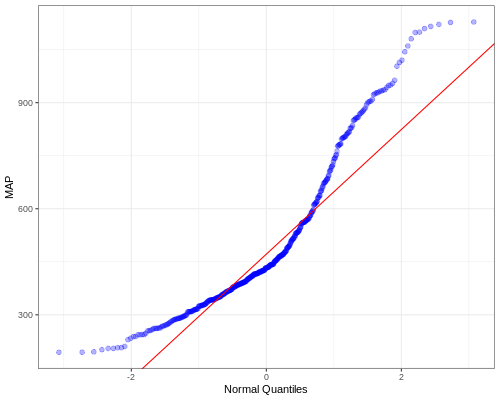

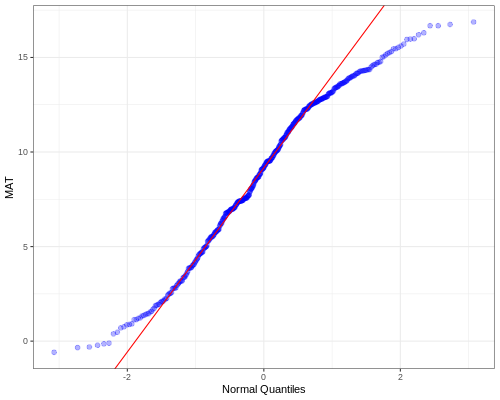

In [29]:
%%R -w 500 -h 400 -u px
ExpOutQQ(df, nlim=10, sample=4) # Remove unused arguments fname and Page

###  Create HTML EDA report

The `ExpReport()` function generates an HTML report summarizing the EDA results. This report includes visualizations, summary statistics, and other relevant information about the dataset.

```R
library (ggthemes)
ExpReport(df,Target=NULL,
          label="car",theme=theme_foundation(),
          op_file="Samp.html")
```



## Summary and Conclusion

The {SmartEDA} package is a comprehensive tool for data exploration in R. Its combination of descriptive statistics, visualization tools, and automated reporting makes it an excellent choice for both beginners and advanced users. With `SmartEDA`, you can streamline your EDA process and focus more on interpreting the results and deriving insights.

## Resources

1.  [SmartEDA](https://daya6489.github.io/SmartEDA/reference/ExpReport.html)